In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from copy import deepcopy

import numpy as np

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

from imodels import HSTreeClassifier, HSTreeRegressor

## IRIS

In [8]:
data = pd.read_csv("iris.csv")
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [49]:
features = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
X = data[features].to_numpy()
y = data["Species"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Initial test

In [34]:
imodel = HSTreeClassifierCV(max_leaf_nodes=3)
imodel.fit(X_train, y_train, feature_names=features)
preds = imodel.predict(X_test)
preds_proba = imodel.predict_proba(X_test)

In [35]:
skmodel = DecisionTreeClassifier(max_leaf_nodes=3)
skmodel.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

[Text(0.4, 0.8333333333333334, 'PetalLength <= 2.45\ngini = 0.666\nsamples = 112\nvalue = [0.312, 0.348, 0.339]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [0.944, 0.029, 0.028]'),
 Text(0.6, 0.5, 'PetalLength <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0.026, 0.494, 0.481]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0.026, 0.905, 0.069]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0.026, 0.151, 0.824]')]

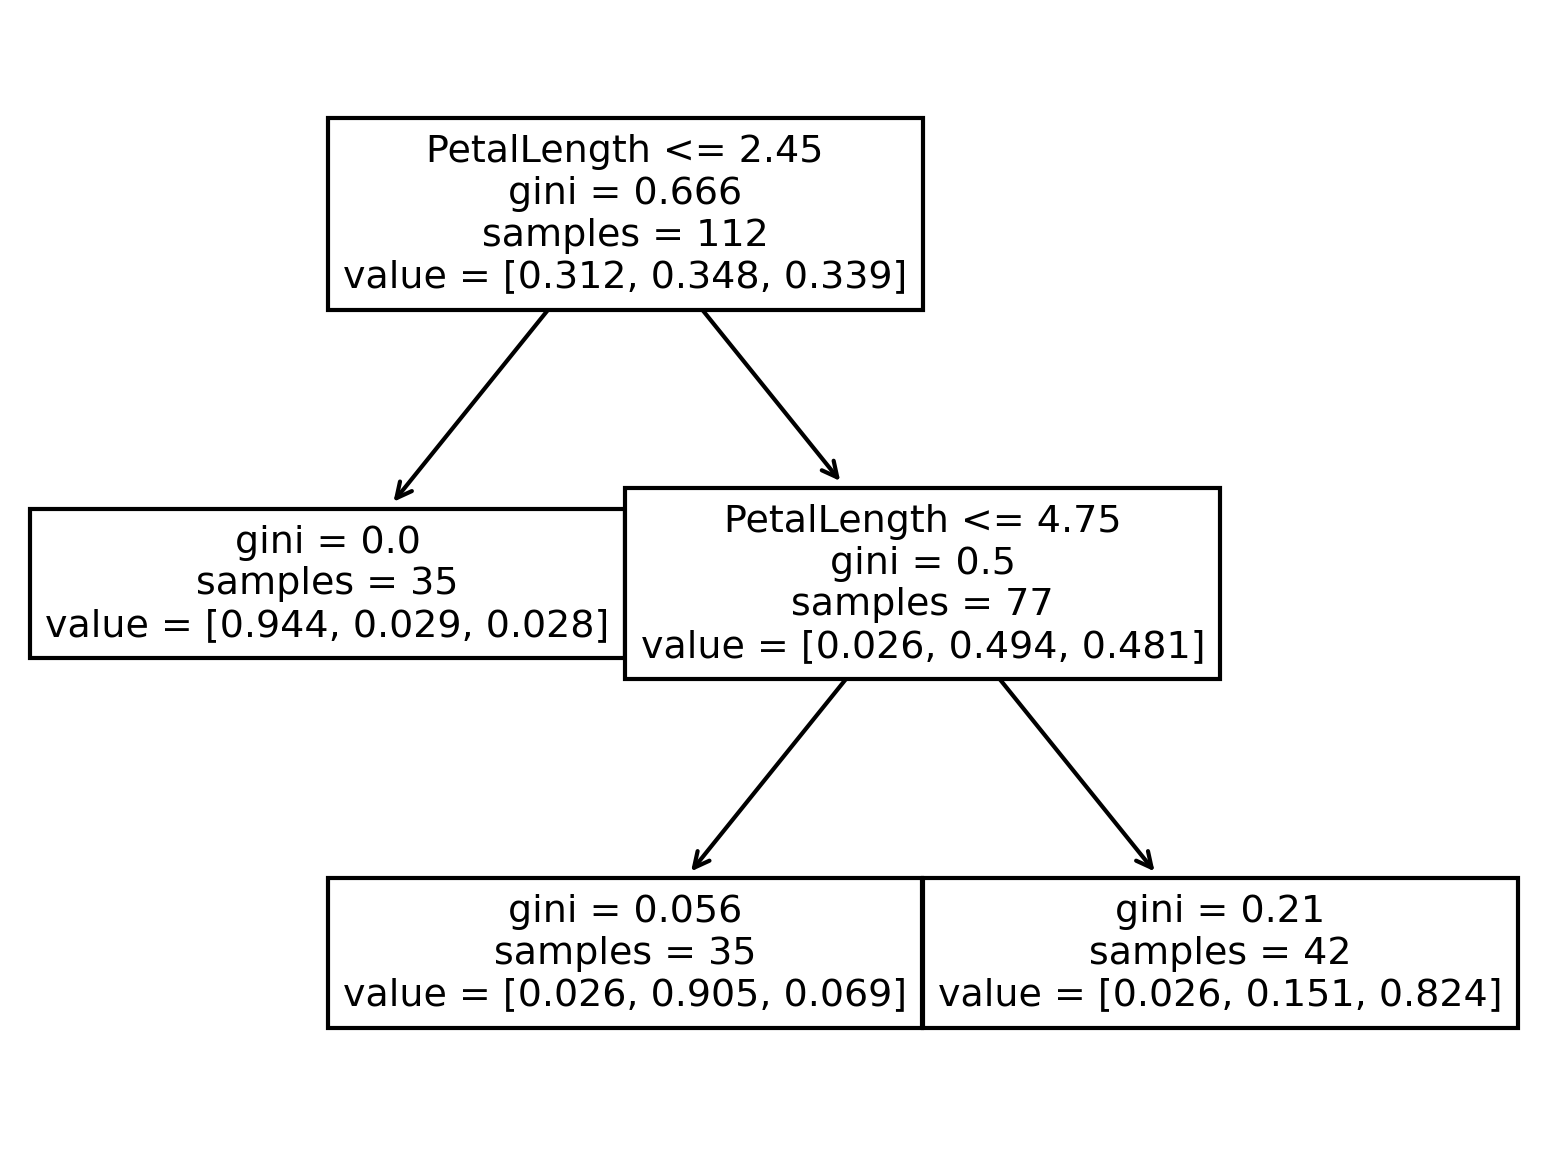

In [36]:
plot_tree(imodel.estimator_, feature_names=features)

[Text(0.4, 0.8333333333333334, 'PetalWidth <= 0.8\ngini = 0.666\nsamples = 112\nvalue = [35, 39, 38]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]'),
 Text(0.6, 0.5, 'PetalLength <= 4.75\ngini = 0.5\nsamples = 77\nvalue = [0, 39, 38]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.21\nsamples = 42\nvalue = [0, 5, 37]')]

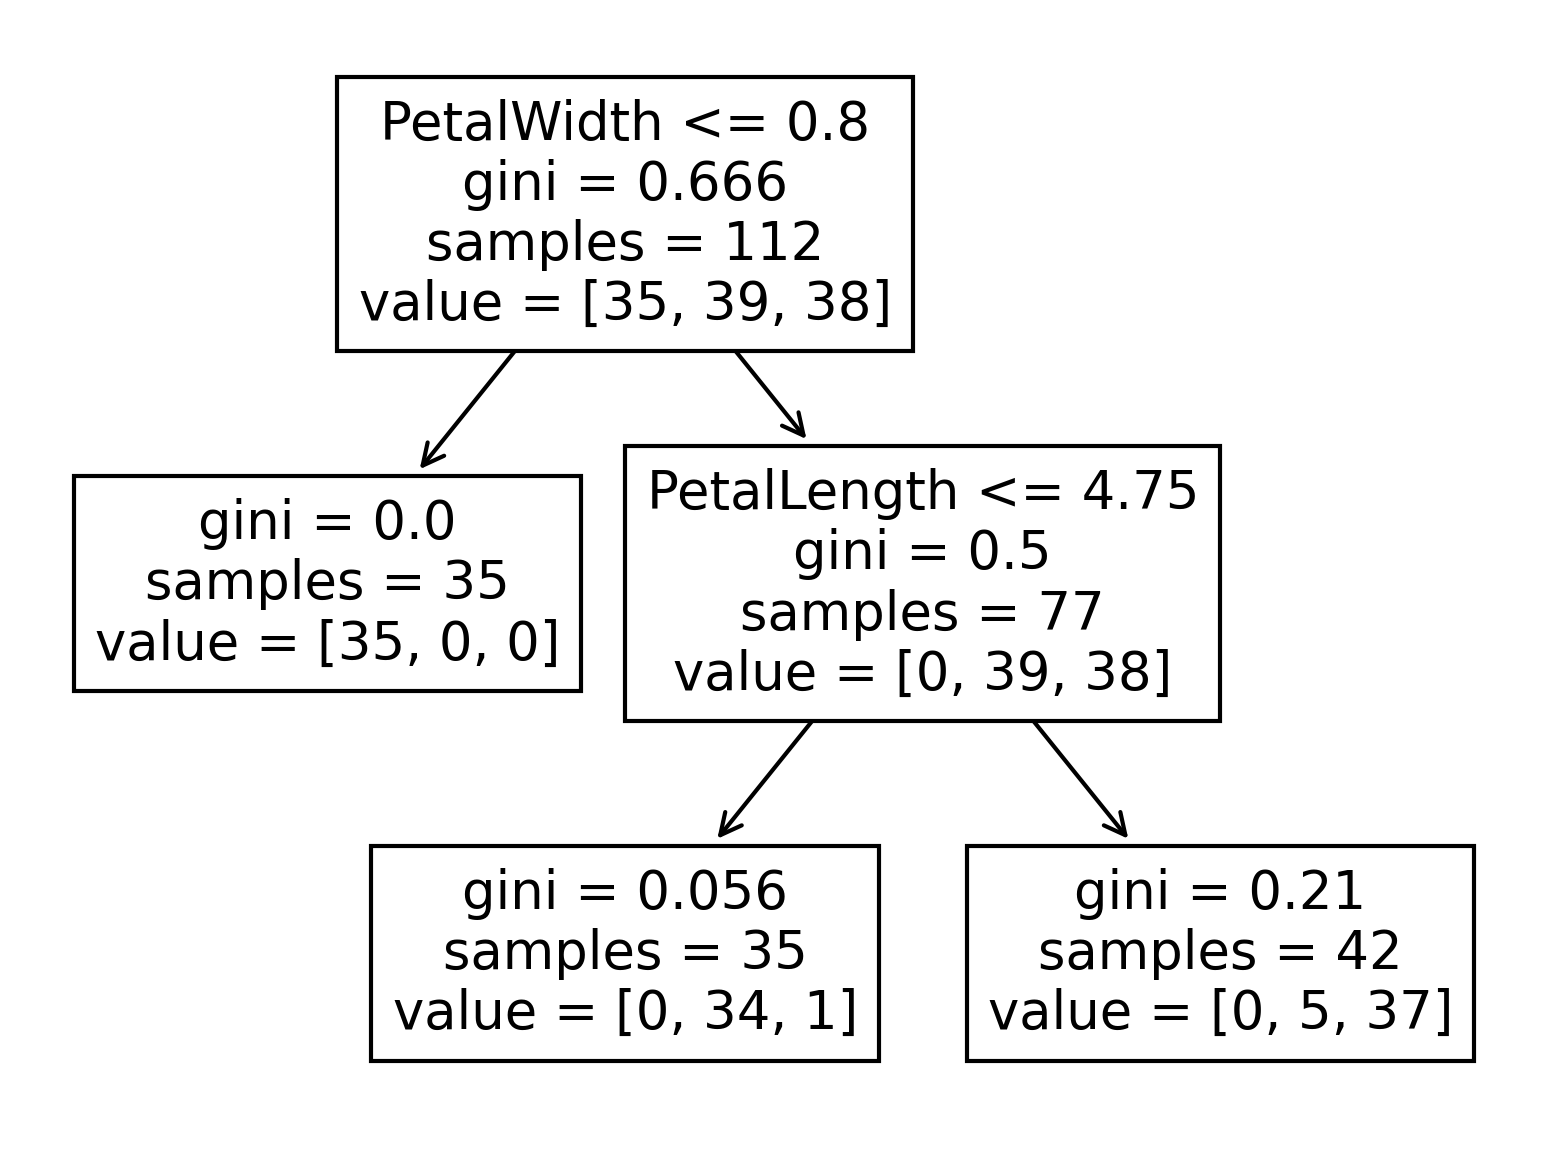

In [33]:
plot_tree(skmodel, feature_names=features)

# Test better accuracy

In [65]:
acc = {"skmodel": [], "imodel": []}
better = {"skmodel": 0, "imodel": 0, "same": 0}

def acc_of_model(model, X, y):
    y_pred = model.predict(X)
    return (y_test == pred).mean()
    

for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    skmodel = DecisionTreeClassifier(max_leaf_nodes=3)
    skmodel.fit(X_train, y_train)
    acc_skmodel = acc_of_model(skmodel, X_test, y_test)
    acc["skmodel"].append(acc_skmodel)
    
    imodel = HSTreeClassifier(deepcopy(skmodel), reg_param=2)
    acc_imodel = acc_of_model(imodel, X_test, y_test)
    acc["imodel"].append(acc_imodel)
    
    if acc_skmodel > acc_imodel:
        better["skmodel"] +=1
    elif acc_skmodel < acc_imodel:
        better["imodel"] +=1
    else:
        better["same"] += 1

In [66]:
better

{'skmodel': 0, 'imodel': 0, 'same': 1000}

# Test shrinkage algorithm

In [10]:
# artificial data

def dgp1(n: int = 10, m: int = 2):
    # y = x1 > 2
    x = np.random.uniform(0, 4, (n, m))
    y = (x[:,0] > 2)*1
    x += np.random.normal(0, 1, (n, m))
    return x, y

In [47]:
np.random.seed(0)
X, y = dgp1(20)

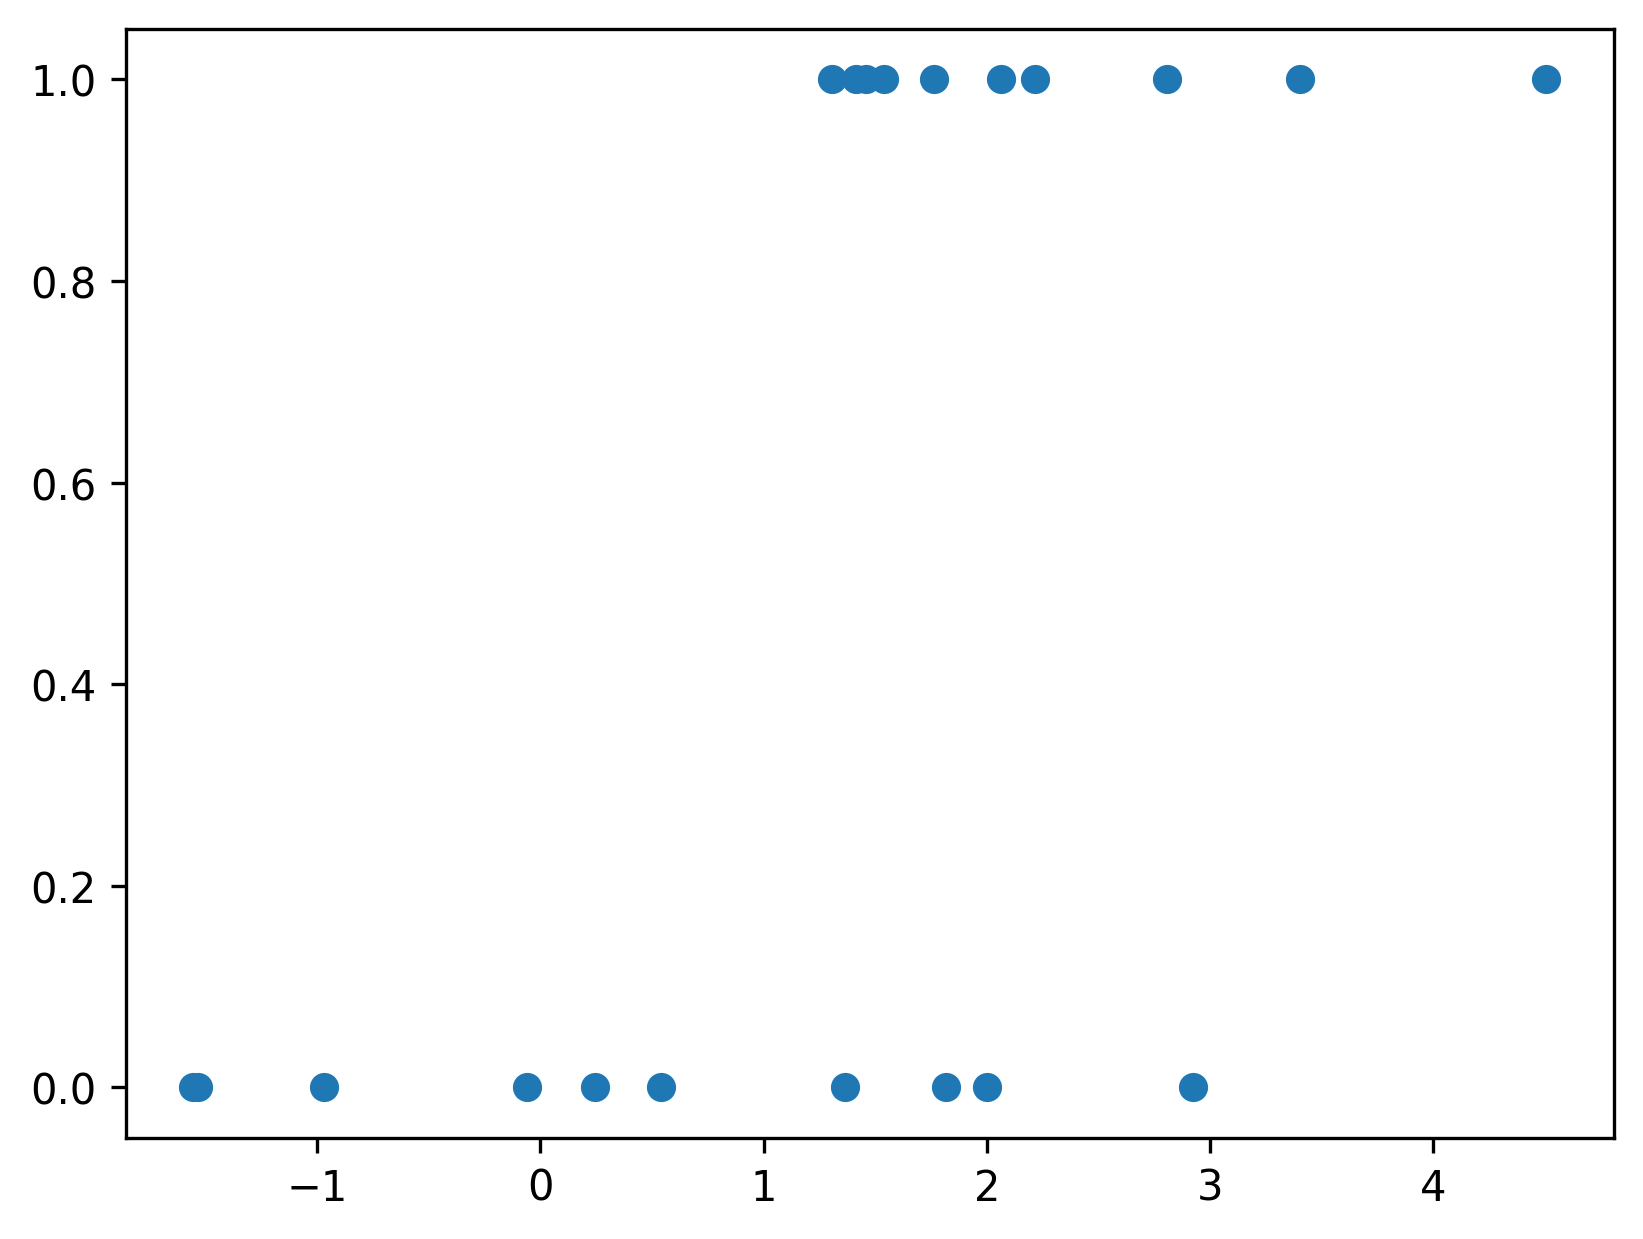

In [48]:
plt.scatter(X[:,0], y)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.924\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.6, 0.5, 'X[1] <= 3.265\ngini = 0.408\nsamples = 14\nvalue = [4, 10]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]')]

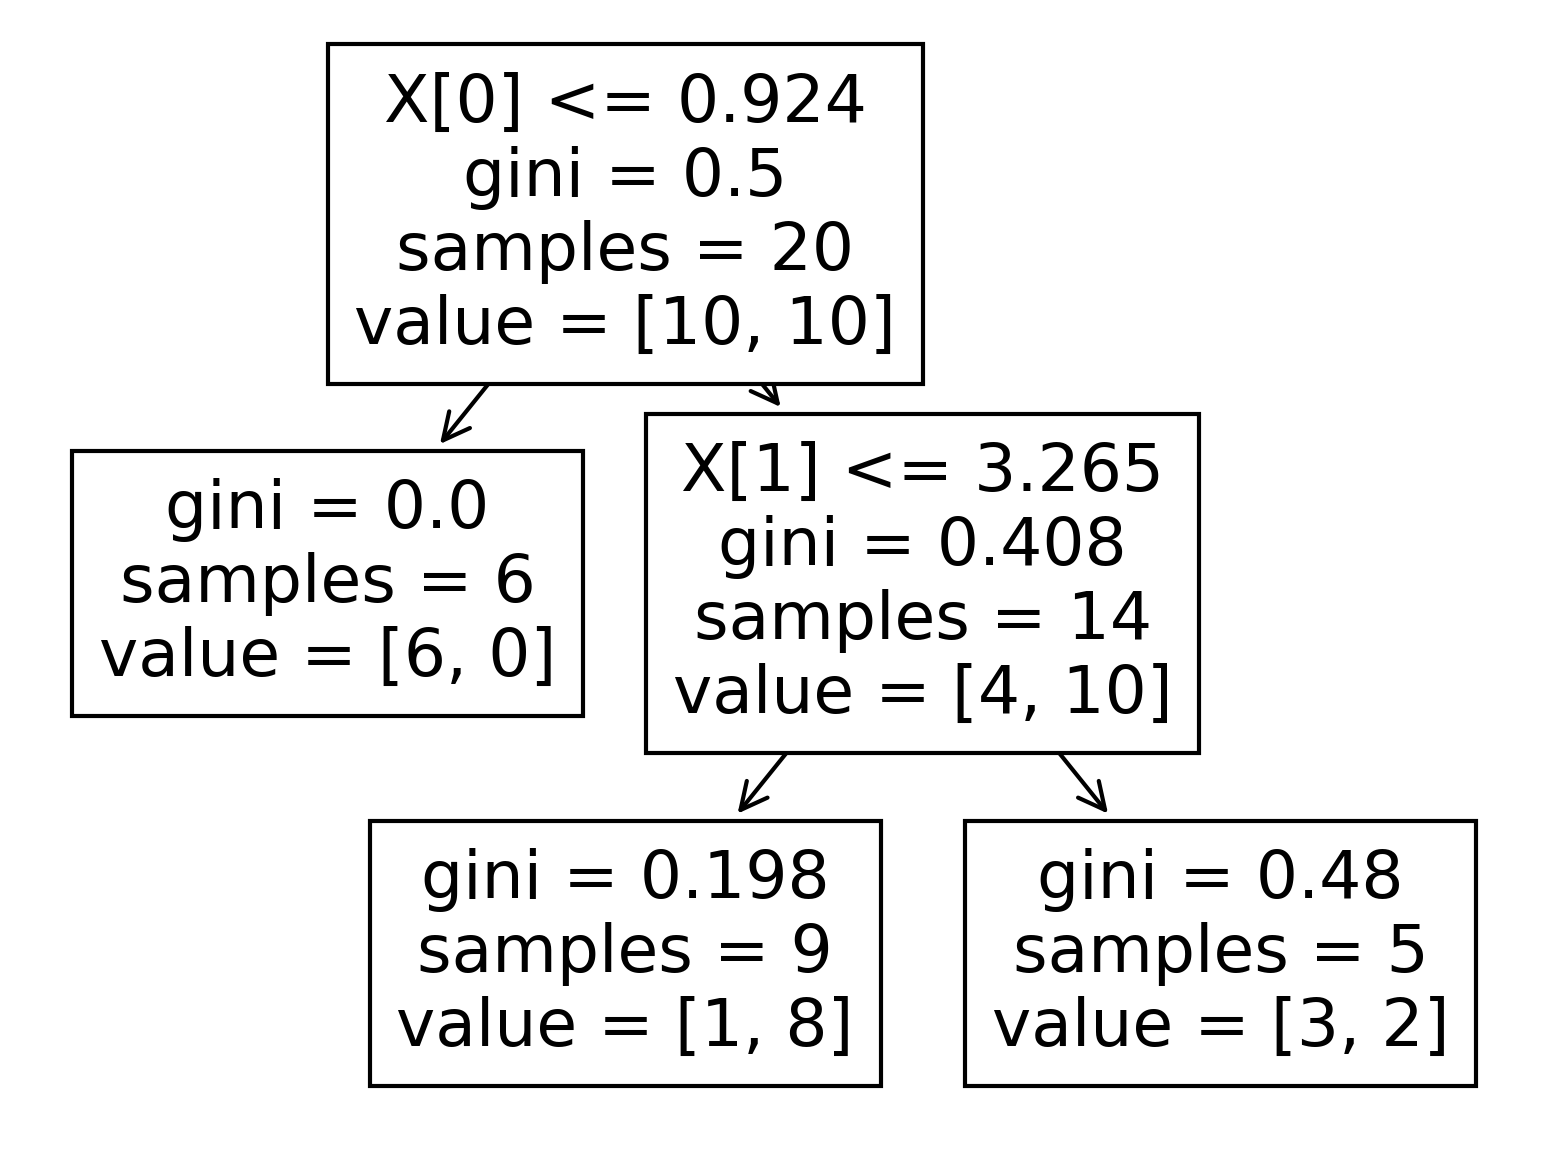

In [49]:
skmodel = DecisionTreeClassifier(max_leaf_nodes=3)
skmodel.fit(X, y)
plot_tree(skmodel)

[Text(0.4, 0.8333333333333334, 'X[0] <= 0.924\ngini = 0.5\nsamples = 20\nvalue = [0.5, 0.5]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0.955, 0.045]'),
 Text(0.6, 0.5, 'X[1] <= 3.265\ngini = 0.408\nsamples = 14\nvalue = [0.305, 0.695]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.198\nsamples = 9\nvalue = [0.152, 0.848]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.48\nsamples = 5\nvalue = [0.58, 0.42]')]

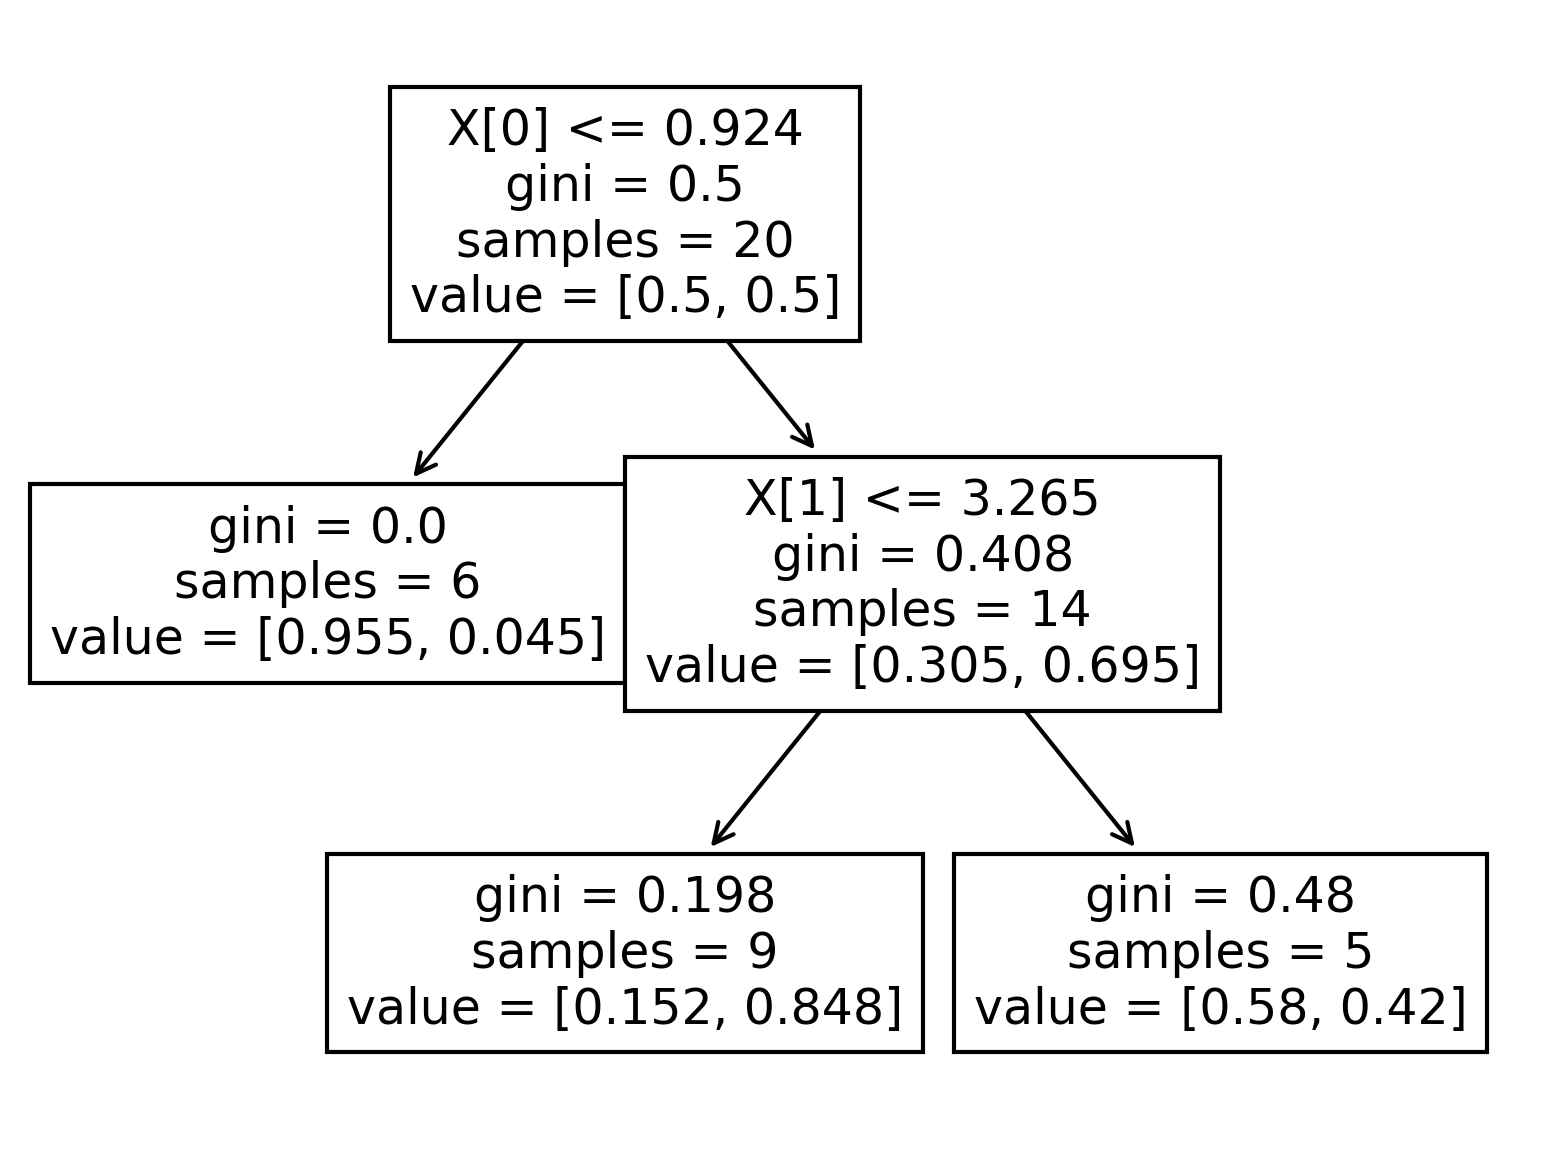

In [52]:
imodel = HSTreeClassifier(deepcopy(skmodel), reg_param=2)
plot_tree(imodel.estimator_)

In [62]:
np.random.seed(1)
X, y = dgp1(20)

skmodel = DecisionTreeClassifier(max_leaf_nodes=4)
skmodel.fit(X, y)
imodel = HSTreeClassifier(deepcopy(skmodel), reg_param=5)
i_tree = imodel.estimator_.tree_

[Text(0.4, 0.875, 'X[0] <= 1.88\ngini = 0.375\nsamples = 20\nvalue = [15, 5]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.6, 0.625, 'X[0] <= 2.811\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.4, 0.375, 'X[1] <= 3.394\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]')]

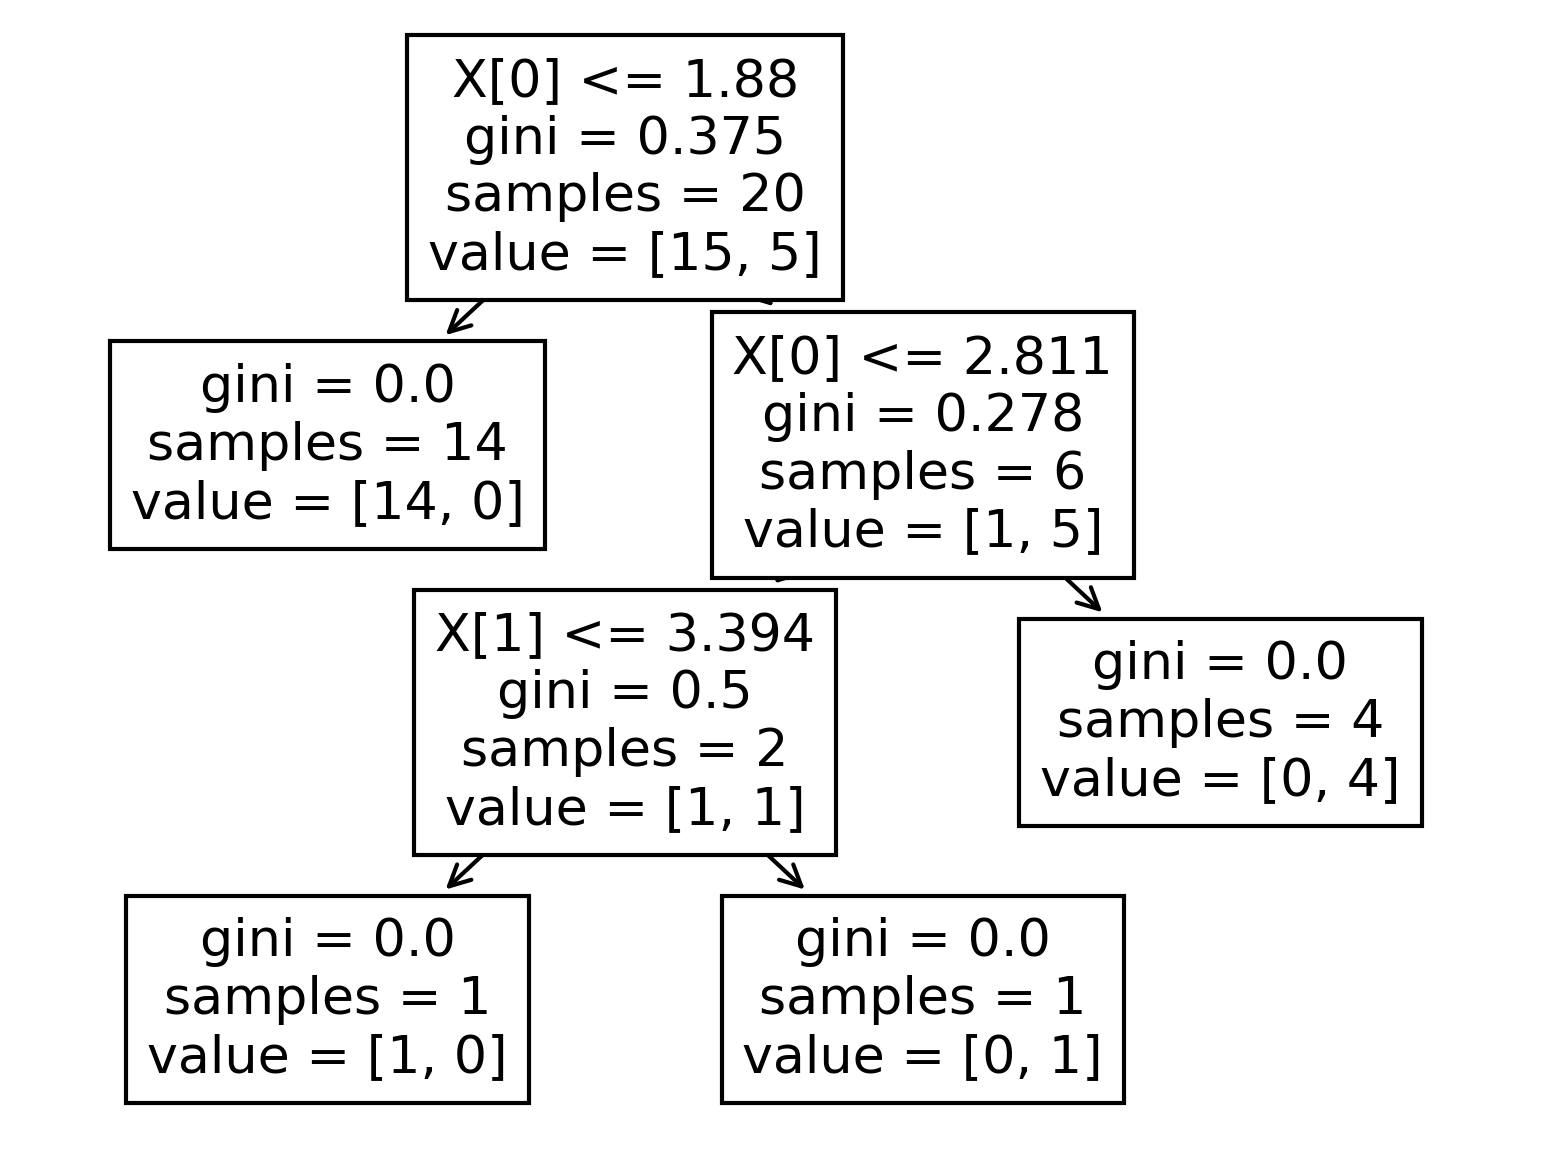

In [65]:
plot_tree(skmodel)

[Text(0.4, 0.875, 'X[0] <= 1.88\ngini = 0.375\nsamples = 20\nvalue = [0.75, 0.25]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 14\nvalue = [0.95, 0.05]'),
 Text(0.6, 0.625, 'X[0] <= 2.811\ngini = 0.278\nsamples = 6\nvalue = [0.283, 0.717]'),
 Text(0.4, 0.375, 'X[1] <= 3.394\ngini = 0.5\nsamples = 2\nvalue = [0.465, 0.535]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0.608, 0.392]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0.322, 0.678]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0.192, 0.808]')]

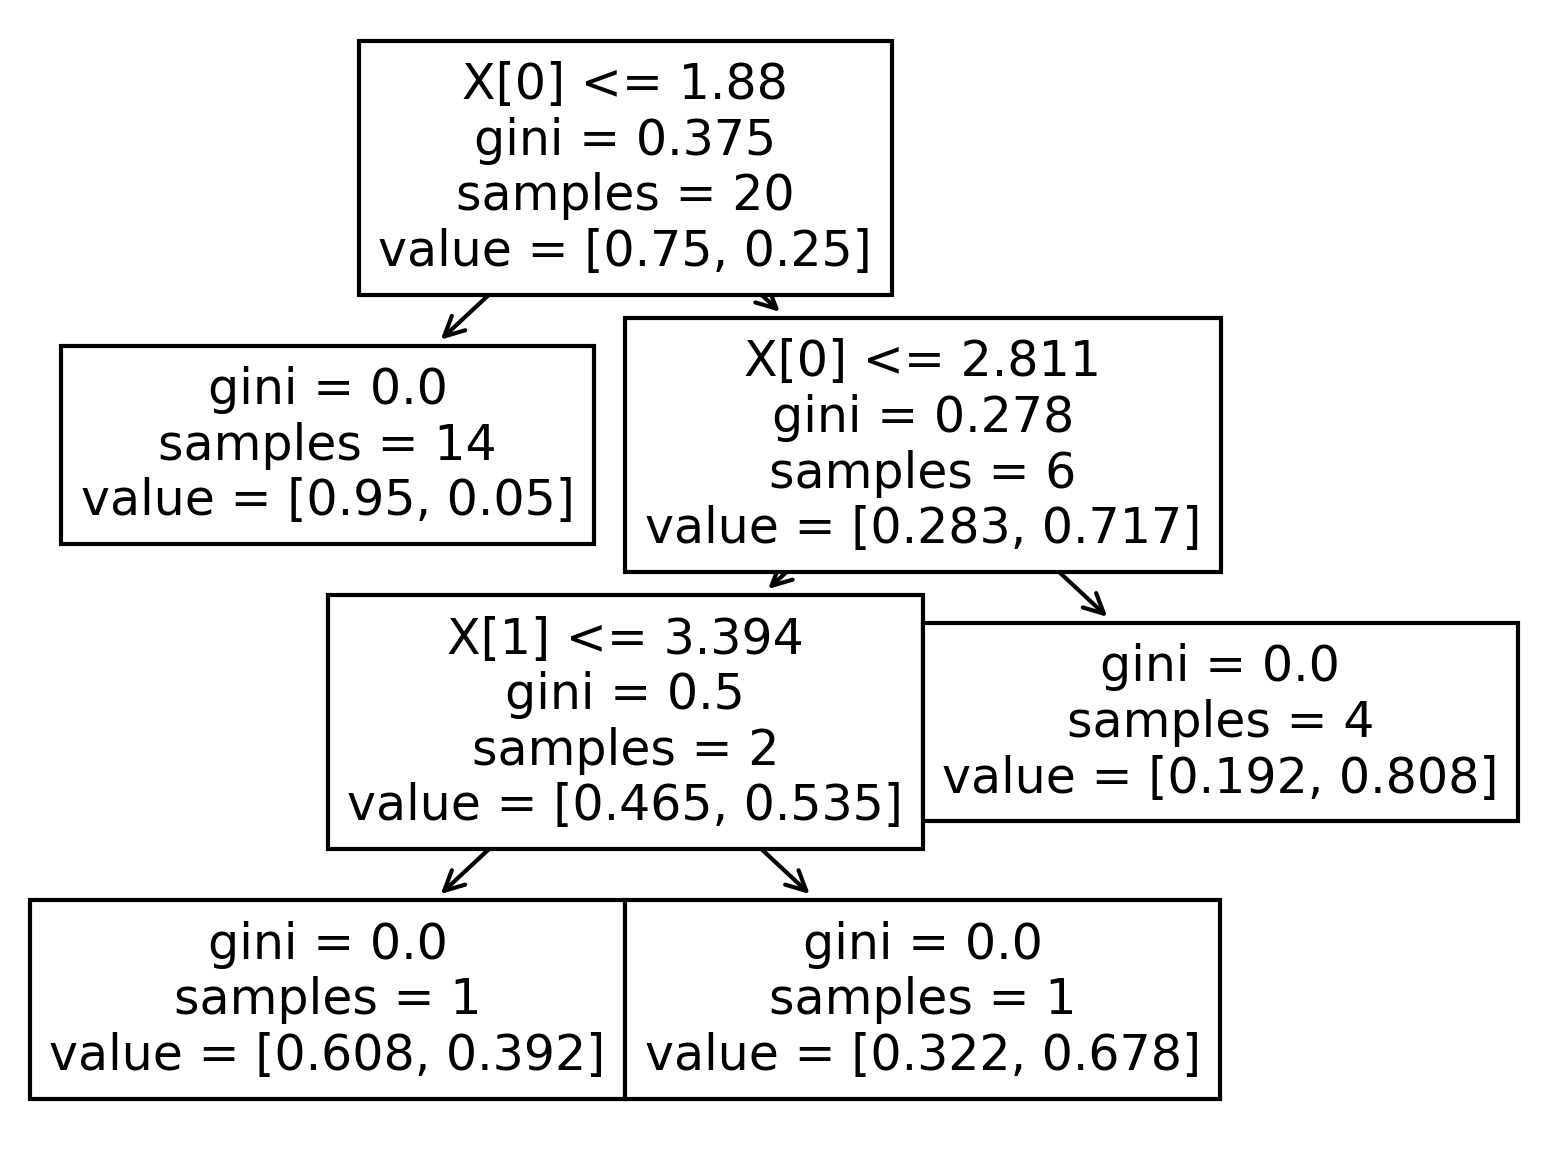

In [67]:
plot_tree(imodel.estimator_)

In [133]:
def DGP_limit_test(n: int = 10, m: int = 2):
    m = min(2, m) # check that m is at least 2
    x = np.random.uniform(0, 4, (n, m))
    y = (1 <= x[:,0])*1 + (2 <= x[:,1])*1 + (3 <= x[:,0])*1
    x += np.random.normal(0, 0.5, (n, m))
    return x, y

In [135]:
np.random.seed(0)
n = 100

X, y = DGP_limit_test(n)

skmodel = DecisionTreeClassifier(max_leaf_nodes=3)
skmodel.fit(X, y)
imodel = HSTreeClassifier(deepcopy(skmodel), reg_param=0)
i_tree = imodel.estimator_.tree_

In [139]:
skmodel.tree_.value

array([[[11., 44., 33., 12.]],

       [[10., 20.,  1.,  0.]],

       [[ 1., 24., 32., 12.]],

       [[ 1., 20.,  6.,  1.]],

       [[ 0.,  4., 26., 11.]]])

In [140]:
skmodel.tree_.weighted_n_node_samples

array([100.,  31.,  69.,  28.,  41.])

In [141]:
skmodel.tree_.value / skmodel.tree_.weighted_n_node_samples[:,None,None]

array([[[0.11      , 0.44      , 0.33      , 0.12      ]],

       [[0.32258065, 0.64516129, 0.03225806, 0.        ]],

       [[0.01449275, 0.34782609, 0.46376812, 0.17391304]],

       [[0.03571429, 0.71428571, 0.21428571, 0.03571429]],

       [[0.        , 0.09756098, 0.63414634, 0.26829268]]])

In [143]:
imodel.estimator_.tree_.value

array([[[ 1.10000000e-01,  4.40000000e-01,  3.30000000e-01,
          1.20000000e-01]],

       [[ 3.22580645e-01,  6.45161290e-01,  3.22580645e-02,
          0.00000000e+00]],

       [[ 1.44927536e-02,  3.47826087e-01,  4.63768116e-01,
          1.73913043e-01]],

       [[ 3.57142857e-02,  7.14285714e-01,  2.14285714e-01,
          3.57142857e-02]],

       [[-5.20417043e-18,  9.75609756e-02,  6.34146341e-01,
          2.68292683e-01]]])

In [145]:
np.testing.assert_almost_equal(
    skmodel.tree_.value / skmodel.tree_.weighted_n_node_samples[:,None,None],
    imodel.estimator_.tree_.value)

## Regression

In [287]:
def DGP_limit_test(n: int = 10, m: int = 2) -> tuple[np.ndarray, np.ndarray]:
    # y = 3 * x1 * x2 - 7 * x2 + 1.5 * x1 - 2
    x = np.random.uniform(0, 4, (n, m))
    y = 3 * x[:,0] * x[:,1] - 7 * x[:,1] + 1.5 * x[:,0] - 2 + np.random.normal(0, 0.5, n)
    return x, y

In [288]:
X, y = DGP_limit_test(n)

skmodel = DecisionTreeRegressor(max_leaf_nodes=4)
skmodel.fit(X, y)
imodel = HSTreeRegressor(deepcopy(skmodel), reg_param=0)

sk_tree = skmodel.tree_
i_tree = imodel.estimator_.tree_

np.testing.assert_almost_equal(sk_tree.value, i_tree.value)

In [290]:
n = 100

for _ in range(10000):
    X, y = DGP_limit_test(n)

    skmodel = DecisionTreeRegressor(max_leaf_nodes=4)
    skmodel.fit(X, y)
    imodel = HSTreeRegressor(deepcopy(skmodel), reg_param=0)

    sk_tree = skmodel.tree_
    i_tree = imodel.estimator_.tree_

    np.testing.assert_almost_equal(sk_tree.value, i_tree.value)